In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url="https://en.wikipedia.org/wiki/List_of_highest-grossing_films"
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html.parser")



data = []
rows = soup.find_all('tr')
# Iterate over the rows and extract the cell data
for row in rows:
    cells = row.find_all(['th', 'td'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    data.append(row_data)
#data[0:15]
X=pd.DataFrame(data)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,142,143,144,145,146,147,148,149,150,151
0,Rank,Peak,Title,Worldwide gross,Year,Reference(s),None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,1,Avatar,"$2,923,706,026",2009,[# 1][# 2],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2,1,Avengers: Endgame,"$2,797,501,328",2019,[# 3][# 4],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,3,Avatar: The Way of Water,"$2,320,250,281",2022,[# 5][# 6],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,4,1,Titanic,"T$2,257,844,554",1997,[# 7][# 8],None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [2]:
E=X[0:51]

E1=E.drop(E.columns[5:152],axis=1)
E2=E1.drop(E.columns[1],axis=1)

E2.head()
E3=E2
#E3 = E2.set_index(E2.columns[0]).rename_axis(None, axis=1)

E3.columns = E3.iloc[0]
E3 =E3[1:]
E3

E4= E3.set_index('Rank')
E4

,Title,Worldwide gross,Year
Rank,,,
1,Avatar,"$2,923,706,026",2009
2,Avengers: Endgame,"$2,797,501,328",2019
3,Avatar: The Way of Water,"$2,320,250,281",2022
4,Titanic,"T$2,257,844,554",1997
5,Star Wars: The Force Awakens,"$2,068,223,624",2015
6,Avengers: Infinity War,"$2,048,359,754",2018
7,Spider-Man: No Way Home,"$1,921,847,111",2021
8,Jurassic World,"$1,671,537,444",2015
9,The Lion King,"$1,656,943,394",2019


In [3]:
E5=E4
E5['Worldwide gross']=E5['Worldwide gross'].str.replace('T', '')
E5['Worldwide gross']=E5['Worldwide gross'].str.replace('HP1', '')
E5['Worldwide gross']=E5['Worldwide gross'].str.replace('F', '')
E5['Worldwide gross']=E5['Worldwide gross'].str.replace('F8', '')
import re

E5['Worldwide gross'] =E5['Worldwide gross'].str.replace(r'^8', '')#   THis is for removing 8 from infront of 23  
E5

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Title,Worldwide gross,Year
Rank,,,
1,Avatar,"$2,923,706,026",2009
2,Avengers: Endgame,"$2,797,501,328",2019
3,Avatar: The Way of Water,"$2,320,250,281",2022
4,Titanic,"$2,257,844,554",1997
5,Star Wars: The Force Awakens,"$2,068,223,624",2015
6,Avengers: Infinity War,"$2,048,359,754",2018
7,Spider-Man: No Way Home,"$1,921,847,111",2021
8,Jurassic World,"$1,671,537,444",2015
9,The Lion King,"$1,656,943,394",2019


# SQL Queries

In [4]:
import sqlite3
!pip install ipython-sql

con=sqlite3.connect('SQL1.db')
#E5.to_sql('mov',con)

%load_ext sql
%sql sqlite:///SQL1.db

'Connected: @SQL1.db'

### Movies earning above 'Avatar: The Way of Water'

In [5]:
%%sql

SELECT Title
FROM mov
WHERE `Worldwide gross` > (SELECT `Worldwide gross` FROM mov WHERE Title = 'Avatar: The Way of Water');


 * sqlite:///SQL1.db
Done.


Title
Avatar
Avengers: Endgame


### Collection of all movies

In [6]:
%%sql

SELECT SUM(CAST(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '')AS sumdollar)) As collection_in_dollar
FROM mov;


 * sqlite:///SQL1.db
Done.


collection_in_dollar
67930017625


### Top 5 movies and its collection

In [7]:
%%sql

SELECT Title, `Worldwide gross`
FROM mov
ORDER BY CAST(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '') AS DECIMAL) DESC
LIMIT 5;


 * sqlite:///SQL1.db
Done.


Title,Worldwide gross
Avatar,"$2,923,706,026"
Avengers: Endgame,"$2,797,501,328"
Avatar: The Way of Water,"$2,320,250,281"
Titanic,"$2,257,844,554"
Star Wars: The Force Awakens,"$2,068,223,624"


### Movies collection above highest grosser of 2015

In [8]:
%%sql
select Title ,`Worldwide gross`
From mov
Where  CAST(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '') AS DECIMAL) > (select (CAST(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '') AS DECIMAL))
                                                                                from mov 
                                                                                 where Year=2015)

 * sqlite:///SQL1.db
Done.


Title,Worldwide gross
Avatar,"$2,923,706,026"
Avengers: Endgame,"$2,797,501,328"
Avatar: The Way of Water,"$2,320,250,281"
Titanic,"$2,257,844,554"


### Average of all movies along with its collection

In [9]:
%%sql

SELECT Title, `Worldwide gross`,(SELECT AVG(CAST(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '') AS DECIMAL)) FROM mov) AS AvgGross

FROM mov
ORDER BY `Worldwide gross` DESC
LIMIT 5  

 * sqlite:///SQL1.db
Done.


Title,Worldwide gross,AvgGross
Avatar,"$2,923,706,026",1358600352.5
Avengers: Endgame,"$2,797,501,328",1358600352.5
Avatar: The Way of Water,"$2,320,250,281",1358600352.5
Titanic,"$2,257,844,554",1358600352.5
Star Wars: The Force Awakens,"$2,068,223,624",1358600352.5


### Total gross in yearly basis

In [10]:
%%sql

SELECT Year, SUM(CAST(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '') AS DECIMAL)) AS TotalGross
FROM mov
GROUP BY Year
ORDER BY TotalGross DESC;

 * sqlite:///SQL1.db
Done.


Year,TotalGross
2019,12437365521
2015,7817356669
2018,7095447769
2017,4869625911
2012,4725585490
2016,4263113020
2022,3813742139
2011,3511647608
2009,2923706026
2013,2504811252


### All movies that earn above 50% of highest grosser

In [11]:
%%sql
SELECT Rank,Title , [Worldwide gross]
FROM mov
WHERE CAST(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '')AS DECIMAL) > (SELECT MAX(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '')) * 0.5  
                                                                               From mov)

 * sqlite:///SQL1.db
Done.


Rank,Title,Worldwide gross
1,Avatar,"$2,923,706,026"
2,Avengers: Endgame,"$2,797,501,328"
3,Avatar: The Way of Water,"$2,320,250,281"
4,Titanic,"$2,257,844,554"
5,Star Wars: The Force Awakens,"$2,068,223,624"
6,Avengers: Infinity War,"$2,048,359,754"
7,Spider-Man: No Way Home,"$1,921,847,111"
8,Jurassic World,"$1,671,537,444"
9,The Lion King,"$1,656,943,394"
10,The Avengers,"$1,518,815,515"


### All movies that were released on same year as of 'Avengers: Endgame'

In [12]:
%%sql
SELECT Title, Year
FROM mov
WHERE Year = (SELECT Year FROM mov WHERE Title = 'Avengers: Endgame');



 * sqlite:///SQL1.db
Done.


Title,Year
Avengers: Endgame,2019
The Lion King,2019
Frozen II,2019
Spider-Man: Far From Home,2019
Captain Marvel,2019
Joker,2019
Star Wars: The Rise of Skywalker,2019
Toy Story 4,2019
Aladdin,2019


### Collection of star war movies

In [13]:
%%sql

SELECT SUM(REPLACE(REPLACE(`Worldwide gross`,'$' ,''),',','')) as star_wars_collection
FROM mov
WHERE Title LIKE '%Star wars%';


 * sqlite:///SQL1.db
Done.


star_wars_collection
6559410855


### Jurassic world total collection

In [14]:
%%sql

SELECT Title, SUM(REPLACE(REPLACE(`Worldwide gross`,'$' ,''),',','')) as collection
FROM mov
WHERE Title LIKE '%Jurassic%';


 * sqlite:///SQL1.db
Done.


Title,collection
Jurassic World,4014209872


### Number of movies released on year 2019 and above

In [15]:
%%sql

select Year,count(Year) as [number of movies] From mov  
where Year >= 2019 group by Year 



 * sqlite:///SQL1.db
Done.


Year,number of movies
2019,9
2021,1
2022,2
2023,1


### Highest grosser year wise

In [16]:
%%sql
select Year,Title,Rank,`Worldwide gross`
From mov
Where (Year,`Worldwide gross`) in (select Year , Max(`Worldwide gross`)
                                  from mov
                                   group by Year
                                  
                                   )
order by Year                             

 * sqlite:///SQL1.db
Done.


Year,Title,Rank,Worldwide gross
1993,Jurassic Park,44,"$1,034,199,003"
1997,Titanic,4,"$2,257,844,554"
1999,Star Wars: Episode I – The Phantom Menace,46,"$1,027,082,707"
2001,Harry Potter and the Philosopher's Stone,50,"$1,009,046,830"
2003,The Lord of the Rings: The Return of the King,28,"$1,147,633,833"
2006,Pirates of the Caribbean: Dead Man's Chest,39,"$1,066,179,747"
2009,Avatar,1,"$2,923,706,026"
2010,Toy Story 3,38,"$1,066,970,811"
2011,Harry Potter and the Deathly Hallows – Part 2,16,"$1,342,139,727"
2012,The Avengers,10,"$1,518,815,515"


### Total collection year wise

In [17]:
%%sql
select Year , Max(`Worldwide gross`)
                                  from mov
                                   group by Year

 * sqlite:///SQL1.db
Done.


Year,Max(`Worldwide gross`)
1993,"$1,034,199,003"
1997,"$2,257,844,554"
1999,"$1,027,082,707"
2001,"$1,009,046,830"
2003,"$1,147,633,833"
2006,"$1,066,179,747"
2009,"$2,923,706,026"
2010,"$1,066,970,811"
2011,"$1,342,139,727"
2012,"$1,518,815,515"


### Total movies every year

In [18]:
%%sql
select year,count(year) AS movies
from mov
group by year
order by count (year) desc 

 * sqlite:///SQL1.db
Done.


Year,movies
2019,9
2018,5
2015,5
2017,4
2016,4
2012,4
2011,3
2022,2
2013,2
2010,2


### Yearly total collection

In [19]:
%%sql

SELECT Year, SUM(CAST(REPLACE(REPLACE(`Worldwide gross`, '$', ''), ',', '') AS DECIMAL)) AS TotalGross
FROM mov
GROUP BY Year
ORDER BY TotalGross DESC;

 * sqlite:///SQL1.db
Done.


Year,TotalGross
2019,12437365521
2015,7817356669
2018,7095447769
2017,4869625911
2012,4725585490
2016,4263113020
2022,3813742139
2011,3511647608
2009,2923706026
2013,2504811252


### Star wars collection

In [20]:
%%sql

SELECT Title,Year,Rank,(REPLACE(REPLACE(`Worldwide gross`,'$' ,''),',','')) as Worldwide_collection
FROM mov
WHERE Title LIKE '%Star wars%';


 * sqlite:///SQL1.db
Done.


Title,Year,Rank,Worldwide_collection
Star Wars: The Force Awakens,2015,5,2068223624
Star Wars: The Last Jedi,2017,17,1332539889
Star Wars: The Rise of Skywalker,2019,36,1074144248
Rogue One: A Star Wars Story,2016,40,1057420387
Star Wars: Episode I – The Phantom Menace,1999,46,1027082707


### SQL with different method

In [21]:
w=pd.read_sql_query("select Title From mov",con)
w.head()

,Title
0,Avatar
1,Avengers: Endgame
2,Avatar: The Way of Water
3,Titanic
4,Star Wars: The Force Awakens


### Star wars collection

In [34]:
w=pd.read_sql_query("select * from mov where Title like '%Star%' ",con)
w

,Rank,Title,Worldwide gross,Year
0,5,Star Wars: The Force Awakens,"$2,068,223,624",2015
1,17,Star Wars: The Last Jedi,"$1,332,539,889",2017
2,36,Star Wars: The Rise of Skywalker,"$1,074,144,248",2019
3,40,Rogue One: A Star Wars Story,"$1,057,420,387",2016
4,46,Star Wars: Episode I – The Phantom Menace,"$1,027,082,707",1999


In [23]:
import matplotlib.pyplot as plt

In [36]:
w1=w['Worldwide gross'].str.replace(',','').str.replace('$','')
w1

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0    2068223624
1    1332539889
2    1074144248
3    1057420387
4    1027082707
Name: Worldwide gross, dtype: object

In [37]:
w1=w['Worldwide gross'].str.replace(',','').str.replace('$','').astype(int)
w1.astype(int)
w['Worldwide gross']=w1

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0    2068223624
1    1332539889
2    1074144248
3    1057420387
4    1027082707
Name: Worldwide gross, dtype: int64

In [41]:
w

,Rank,Title,Worldwide gross,Year
0,5,Star Wars: The Force Awakens,2068223624,2015
1,17,Star Wars: The Last Jedi,1332539889,2017
2,36,Star Wars: The Rise of Skywalker,1074144248,2019
3,40,Rogue One: A Star Wars Story,1057420387,2016
4,46,Star Wars: Episode I – The Phantom Menace,1027082707,1999


<function matplotlib.pyplot.show(close=None, block=None)>

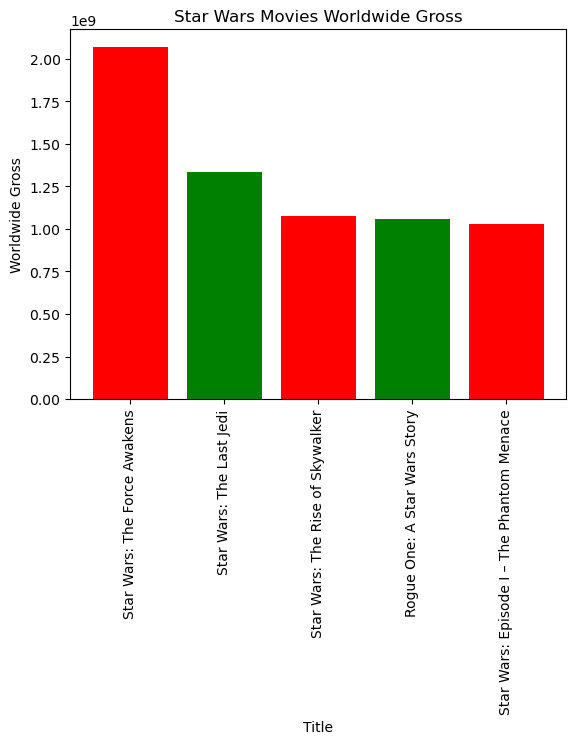

In [42]:
plt.bar(x=w['Title'],height=w['Worldwide gross'],color = ['red','green'])
plt.xlabel('Title')
plt.ylabel('Worldwide Gross')
plt.title('Star Wars Movies Worldwide Gross')
plt.xticks(rotation=90)
plt.show

### Movies of 2019

In [44]:
Q=pd.read_sql_query("select * from mov where year= 2019 ",con)
Q

,Rank,Title,Worldwide gross,Year
0,2,Avengers: Endgame,"$2,797,501,328",2019
1,9,The Lion King,"$1,656,943,394",2019
2,13,Frozen II,"$1,450,026,933",2019
3,29,Spider-Man: Far From Home,"$1,131,927,996",2019
4,30,Captain Marvel,"$1,128,274,794",2019
5,35,Joker,"$1,074,458,282",2019
6,36,Star Wars: The Rise of Skywalker,"$1,074,144,248",2019
7,37,Toy Story 4,"$1,073,394,593",2019
8,41,Aladdin,"$1,050,693,953",2019


In [45]:
Q1=Q['Worldwide gross'].str.replace(',','').str.replace('$','').astype(int)
Q1.astype(int)
Q['Worldwide gross']=Q1

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(close=None, block=None)>

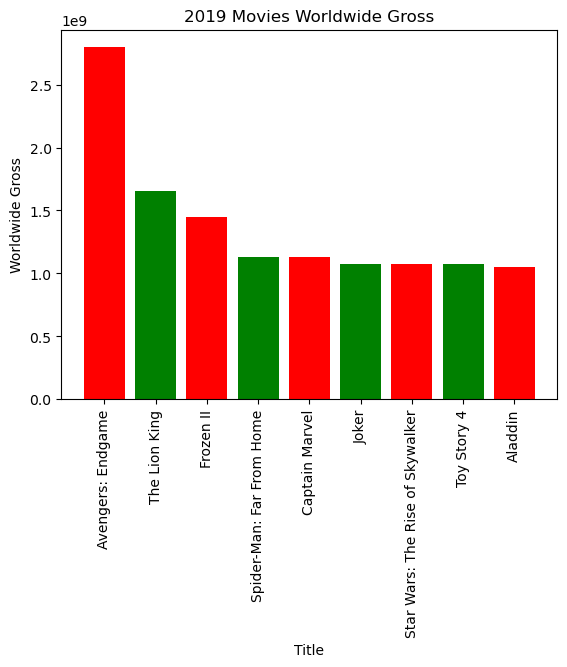

In [46]:
plt.bar(x=Q['Title'],height=Q['Worldwide gross'],color = ['red','green'])
plt.xlabel('Title')
plt.ylabel('Worldwide Gross')
plt.title('2019 Movies Worldwide Gross')
plt.xticks(rotation=90)
plt.show

In [54]:
Q=pd.read_sql_query("select * from mov where year= 2021 or year=2023 or year=2022",con)
Q

,Rank,Title,Worldwide gross,Year
0,3,Avatar: The Way of Water,"$2,320,250,281",2022
1,7,Spider-Man: No Way Home,"$1,921,847,111",2021
2,12,Top Gun: Maverick,"$1,493,491,858",2022
3,19,The Super Mario Bros. Movie,"$1,307,289,336",2023
